In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("loan_data_2007_2014.csv")
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31716\2365413417.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleansing

## Data Information

In [43]:
df.isna().sum()[df.isna().sum() > 0]

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m  

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Eliminated irrelevant features and features with 100% missing values

In [45]:
df = df.dropna(axis=1, how="all")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.isna().sum()[df.isna().sum() > 0]

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340304
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

## Handle Missing Values

In [47]:
missing_percentage = round((df.isna().sum()[df.isna().sum()>0] / len(df)) * 100, 2)
print(missing_percentage)
print(len(missing_percentage))


emp_title                       5.92
emp_length                      4.51
annual_inc                      0.00
desc                           72.98
title                           0.00
delinq_2yrs                     0.01
earliest_cr_line                0.01
inq_last_6mths                  0.01
mths_since_last_delinq         53.69
mths_since_last_record         86.57
open_acc                        0.01
pub_rec                         0.01
revol_util                      0.07
total_acc                       0.01
last_pymnt_d                    0.08
next_pymnt_d                   48.73
last_credit_pull_d              0.01
collections_12_mths_ex_med      0.03
mths_since_last_major_derog    78.77
acc_now_delinq                  0.01
tot_coll_amt                   15.07
tot_cur_bal                    15.07
total_rev_hi_lim               15.07
dtype: float64
23


There are 23 features with missing values, with even three of three features having more 70% missing values

In [48]:
missing_info = pd.DataFrame({
    "Column Name": missing_percentage.index,
    "Missing Percentage": missing_percentage.values,
    "Data Type": df[missing_percentage.index].dtypes.values
})
missing_info.sort_values("Missing Percentage", ascending=False, inplace=True)

missing_info

,Column Name,Missing Percentage,Data Type
9,mths_since_last_record,86.57,float64
18,mths_since_last_major_derog,78.77,float64
3,desc,72.98,object
8,mths_since_last_delinq,53.69,float64
15,next_pymnt_d,48.73,object
22,total_rev_hi_lim,15.07,float64
21,tot_cur_bal,15.07,float64
20,tot_coll_amt,15.07,float64
0,emp_title,5.92,object
1,emp_length,4.51,object


In [49]:
df = df.dropna(subset=missing_percentage[missing_percentage < 10].index)
print(round((df.isna().sum()[df.isna().sum()>0] / len(df)) * 100, 2))

desc                           73.20
mths_since_last_delinq         53.62
mths_since_last_record         87.09
next_pymnt_d                   48.85
mths_since_last_major_derog    78.88
tot_coll_amt                   14.98
tot_cur_bal                    14.98
total_rev_hi_lim               14.98
dtype: float64


We eliminated features with less than 10% missing value and kept features with more than 10% missing values

In [50]:
df = df[df.columns[~df.columns.isin(['desc', 'mths_since_last_record', 'next_pymnt_d'])]]

KeyError: 'mths_since_last_record'

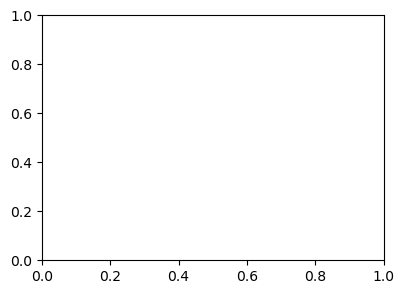

In [51]:
plt.figure(figsize=(15, 7))
for idx, col in enumerate(['mths_since_last_record', 'mths_since_last_delinq', 'mths_since_last_major_derog','tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']):
    plt.subplot(2, 3, idx + 1)  
    sns.histplot(x=df[col], data=df)  
    plt.title(col)  

plt.tight_layout()
plt.show()

In [ ]:
for col in ['mths_since_last_delinq', 'mths_since_last_major_derog']:
    df[col] = df[col].fillna(0)

In [ ]:
print(round((df.isna().sum()[df.isna().sum()>0] / len(df)) * 100, 2))

tot_coll_amt        14.98
tot_cur_bal         14.98
total_rev_hi_lim    14.98
dtype: float64


In [ ]:
for col in ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']:
    df[col] = df[col].fillna(df[col].median())
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

## Duplicated Data

In [ ]:
df.duplicated().sum()

0

## Unique Values

In [52]:
print("Unique Values for Numerical Featutes")
print(df.select_dtypes(exclude='object').nunique())

Unique Values for Numerical Featutes
id                             437709
member_id                      437709
loan_amnt                        1349
funded_amnt                      1351
funded_amnt_inv                  9373
int_rate                          503
installment                     54146
annual_inc                      28037
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     27
mths_since_last_delinq            143
open_acc                           61
pub_rec                            25
revol_bal                       57256
revol_util                       1260
total_acc                         112
out_prncp                      127760
out_prncp_inv                  132928
total_pymnt                    331843
total_pymnt_inv                328537
total_rec_prncp                162300
total_rec_int                  259382
total_rec_late_fee               5484
recoveries                      20963
collection_re

- id and member_id are unique
- policy_code only have single unique value

In [53]:
print("Unique Values for Categorical Featutes")
print(df.select_dtypes(exclude=['int', 'float']).nunique())

Unique Values for Categorical Featutes
term                        2
grade                       7
sub_grade                  35
emp_title              204992
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    89
loan_status                 9
pymnt_plan                  2
url                    437709
purpose                    14
title                   59048
zip_code                  887
addr_state                 50
earliest_cr_line          647
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        100
application_type            1
dtype: int64


- emp_title, url, title, zip_code, earliest_cr_line has many unique values
- applicaion_type only have single unique value

In [62]:
for col in df.columns: 
    print(f"\nUnique for {col}")
    print(df[col].unique())


Unique for id
[1077430 1076863 1075358 ... 9684700 9584776 9604874]

Unique for member_id
[ 1314167  1277178  1311748 ... 11536848 11436914 11457002]

Unique for loan_amnt
[ 2500 10000  3000 ... 27775 33175 27925]

Unique for funded_amnt
[ 2500 10000  3000 ... 33175 31725 27925]

Unique for funded_amnt_inv
[ 2500. 10000.  3000. ... 30275. 33125. 33625.]

Unique for term
[' 60 months' ' 36 months']

Unique for int_rate
[15.27 13.49 12.69  7.9  15.96 18.64 14.65  9.91 10.65 16.29  6.03 11.71
 12.42 16.77  8.9   7.51  6.62 19.91 17.27 14.27 21.28 17.58 21.67 19.42
 22.06 20.89 18.25 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49 15.99 16.49  6.99 12.99
 15.23 14.79  8.49  5.42 17.49 10.59 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 16.59 17.19 12.87
 20.69  9.67 21.82 19.79 18.49 13.84 22.94 24.4  21.48 14.82 17.88 2

# Deskriptive Statistics

In [ ]:
num_cols = df.select_dtypes("number").columns
cat_cols = df.select_dtypes("object").columns

print(f"Numerical Columns {num_cols}")
print(f"Categorical Columns {cat_cols}")

Numerical Columns Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim'],
      dtype='object')
Categorical Columns Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymn

In [ ]:
df[num_cols].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.377090e+05,4.377090e+05,437709.000000,437709.000000,437709.000000,437709.000000,437709.000000,4.377090e+05,437709.000000,437709.000000,...,437709.000000,437709.000000,437709.000000,437709.000000,92436.000000,437709.0,437709.000000,3.721610e+05,3.721610e+05,3.721610e+05
mean,1.313856e+07,1.465976e+07,14442.785161,14417.452177,14348.796897,13.823953,434.982544,7.412606e+04,17.216794,0.287058,...,84.633691,8.891871,3188.095737,0.009072,42.830045,1.0,0.004023,1.892090e+02,1.408849e+05,3.049337e+04
std,1.091121e+07,1.170089e+07,8278.534233,8267.108792,8290.350609,4.358291,242.815094,5.517243e+04,7.813355,0.800888,...,551.424555,84.400762,5613.300070,0.108754,21.670294,0.0,0.068934,1.508285e+04,1.526475e+05,3.745924e+04
min,5.552100e+04,7.472400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,1.000000e+02
25%,3.642788e+06,4.418034e+06,8000.000000,8000.000000,8000.000000,10.990000,260.490000,4.550000e+04,11.400000,0.000000,...,0.000000,0.000000,317.540000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.966200e+04,1.370000e+04
50%,1.012059e+07,1.195335e+07,12375.000000,12325.000000,12175.000000,13.660000,382.990000,6.400000e+04,16.870000,0.000000,...,0.000000,0.000000,554.040000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.472900e+04,2.300000e+04
75%,2.076923e+07,2.303356e+07,20000.000000,20000.000000,20000.000000,16.490000,569.950000,9.000000e+04,22.750000,0.000000,...,0.000000,0.000000,3375.970000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.117870e+05,3.810000e+04
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


form the table we can see that some features have spreaded data, like member_id, delinq_2yrs, pub_rec, out_prncp

In [ ]:
df[cat_cols].describe().transpose()

,count,unique,top,freq
term,437709,2,36 months,314586
grade,437709,7,B,128588
sub_grade,437709,35,B3,29730
emp_title,437709,204992,Teacher,5392
emp_length,437709,11,10+ years,147165
home_ownership,437709,6,MORTGAGE,222212
verification_status,437709,3,Verified,148957
issue_d,437709,89,Oct-14,36651
loan_status,437709,9,Current,210060
pymnt_plan,437709,2,n,437700


In [ ]:
for col in cat_cols: 
    print(f"\nCount Values for {col}")
    print(df[col].value_counts())


Count Values for term
term
36 months    314586
60 months    123123
Name: count, dtype: int64

Count Values for grade
grade
B    128588
C    117685
D     71987
A     70348
E     33550
F     12432
G      3119
Name: count, dtype: int64

Count Values for sub_grade
sub_grade
B3    29730
B4    28661
C1    25282
C2    25154
B2    24953
C3    23789
B5    23721
C4    22640
B1    21523
C5    20820
A5    20473
D1    18028
A4    17864
D2    15974
D3    13941
D4    13218
A3    11772
D5    10826
A2    10298
A1     9941
E1     8473
E2     8153
E3     6537
E4     5641
E5     4746
F1     3684
F2     2826
F3     2550
F4     1943
F5     1429
G1     1038
G2      774
G3      550
G4      398
G5      359
Name: count, dtype: int64

Count Values for emp_title
emp_title
Teacher                            5392
Manager                            4429
Registered Nurse                   2314
RN                                 2202
Supervisor                         1966
                                   ... 
gene

# EDA

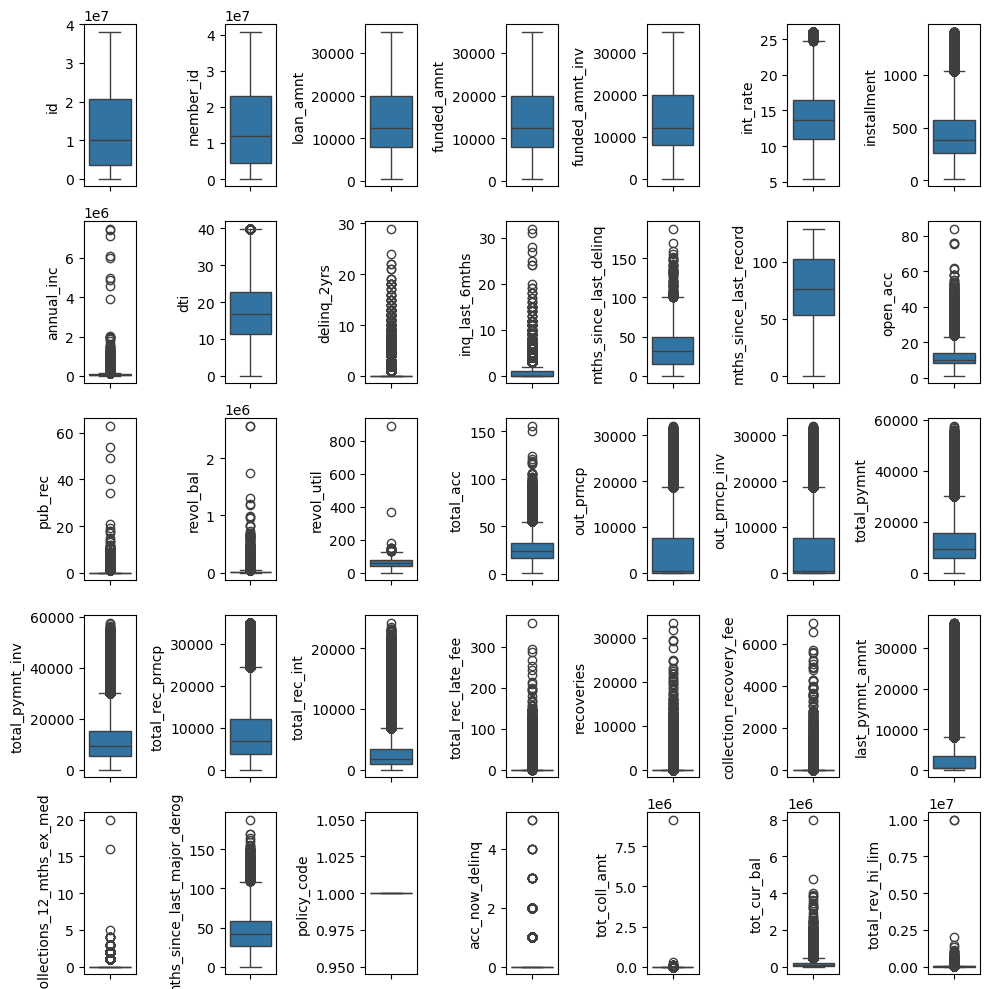

In [ ]:
plt.figure(figsize=(10,10))

for i in range (0, len(num_cols)):
    plt.subplot(5, 7, i+1)
    sns.boxplot(y=df[num_cols[i]], orient='v')
    plt.tight_layout()

Plotting for missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437709 entries, 1 to 466283
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           437709 non-null  int64  
 1   member_id                    437709 non-null  int64  
 2   loan_amnt                    437709 non-null  int64  
 3   funded_amnt                  437709 non-null  int64  
 4   funded_amnt_inv              437709 non-null  float64
 5   term                         437709 non-null  object 
 6   int_rate                     437709 non-null  float64
 7   installment                  437709 non-null  float64
 8   grade                        437709 non-null  object 
 9   sub_grade                    437709 non-null  object 
 10  emp_title                    437709 non-null  object 
 11  emp_length                   437709 non-null  object 
 12  home_ownership               437709 non-null  object 
 13  annu

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31716\1198015752.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_cols[i]])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_31716\1198015752.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_cols[i]])
C:\Users\Lenovo\AppData\Local\Temp

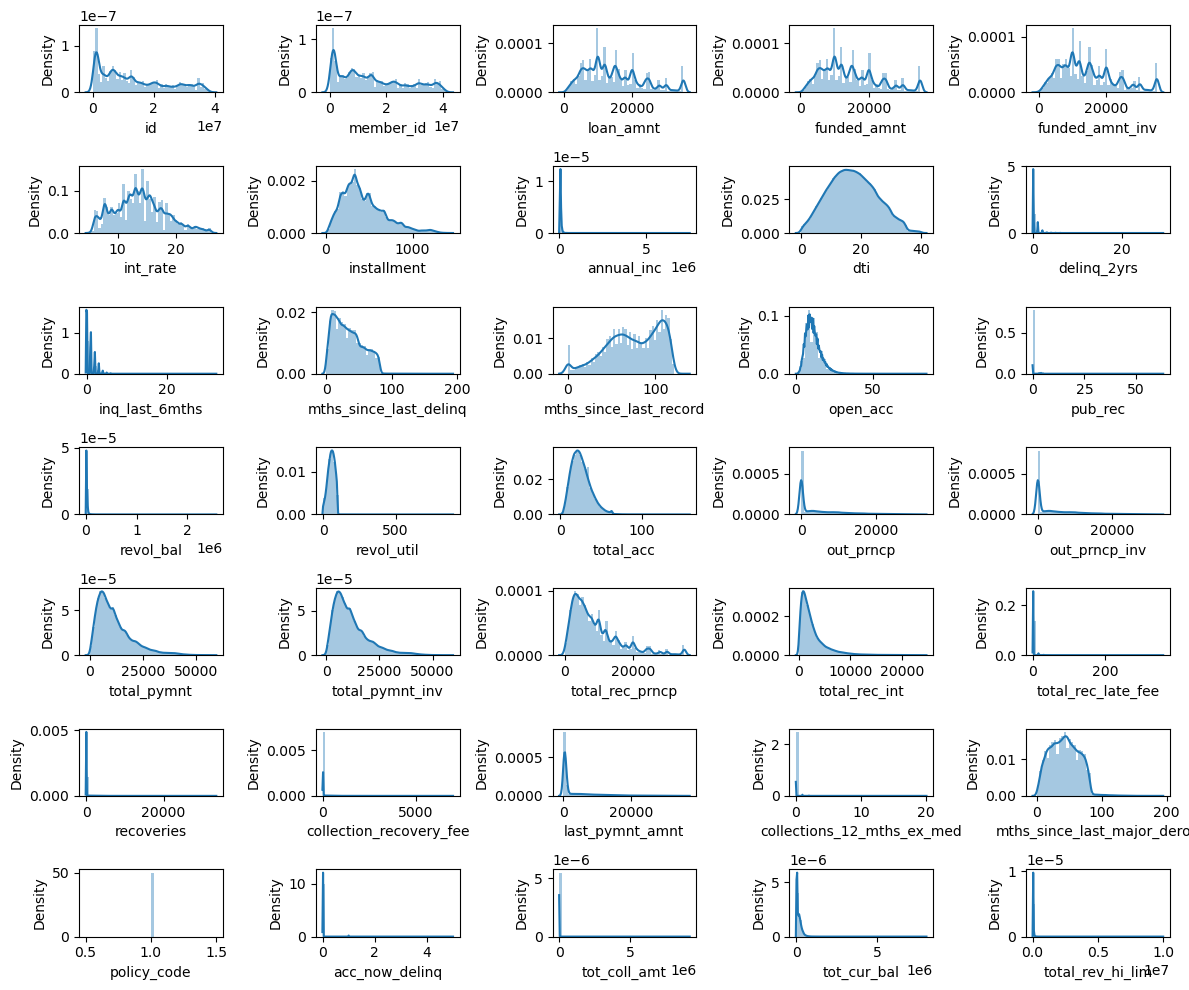

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(0, len(num_cols)):
    plt.subplot(7, 5, i+1)
    sns.distplot(df[num_cols[i]])
    plt.tight_layout()